### Setup

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

In [8]:
sns.set_theme()

### Load data

In [9]:
data = datasets.load_iris()

In [10]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
data["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### DataFrame preparation

In [16]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [17]:
df["target"] = data["target"]
df["target_name"] = df["target"].map(dict(zip(range(0, len(data["target_names"])), data["target_names"])))

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data visualization

In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


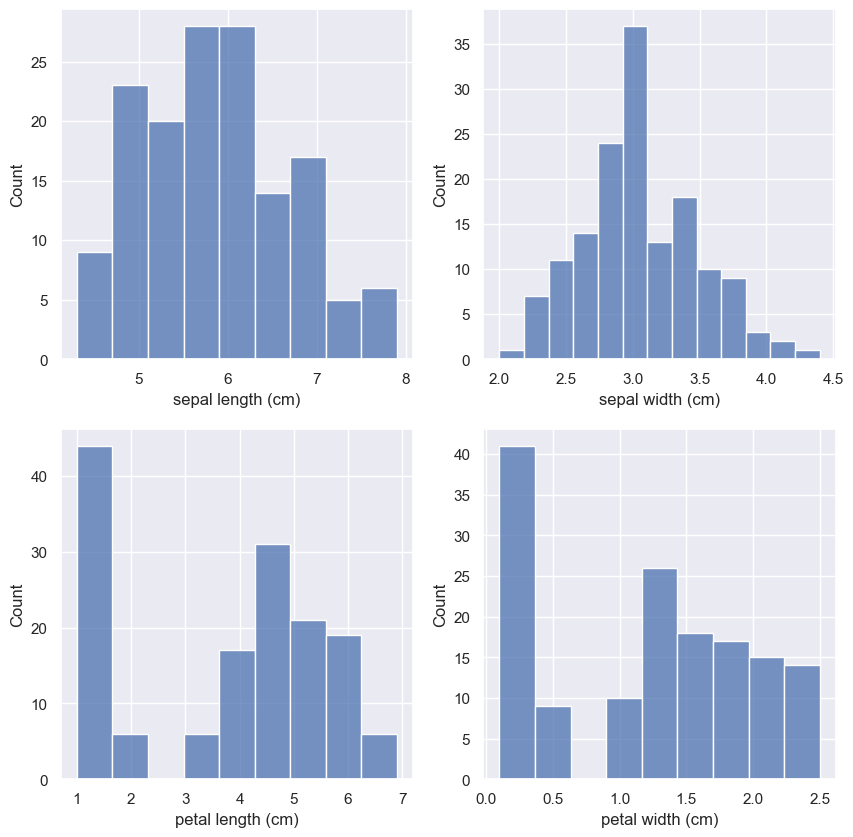

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i in range(0, len(data["feature_names"])):
    col = data["feature_names"][i]
    sns.histplot(data=df, x=col, ax=axs[i])

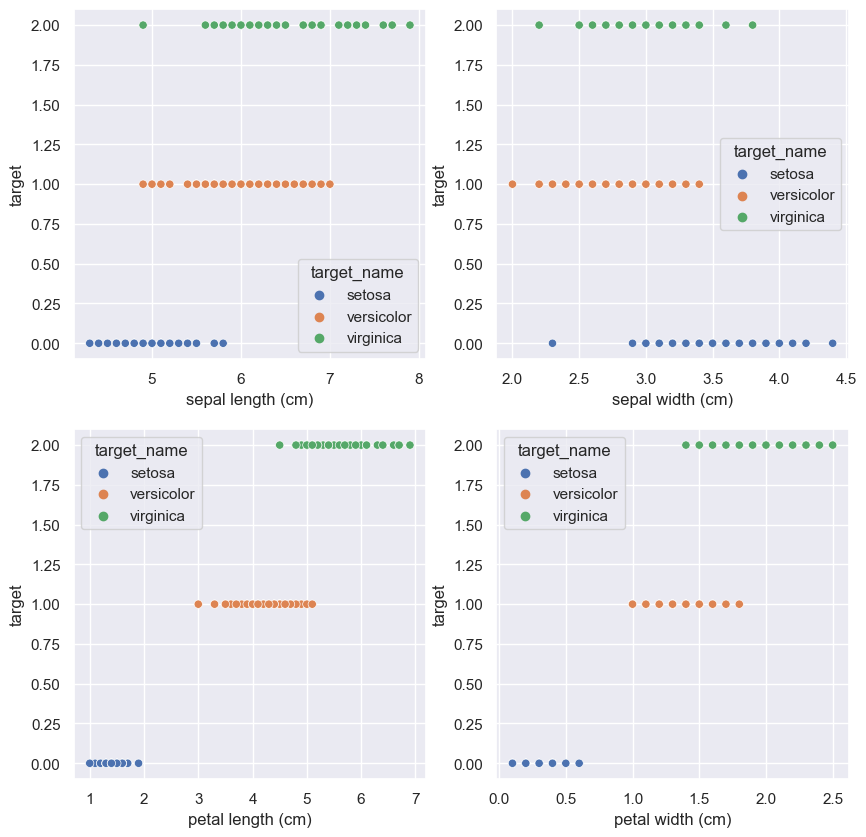

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i in range(0, len(data["feature_names"])):
    col = data["feature_names"][i]
    sns.scatterplot(data=df, x=col, y="target", hue="target_name", ax=axs[i])

### Exploratory Data Analysis (EDA) - Pairplots

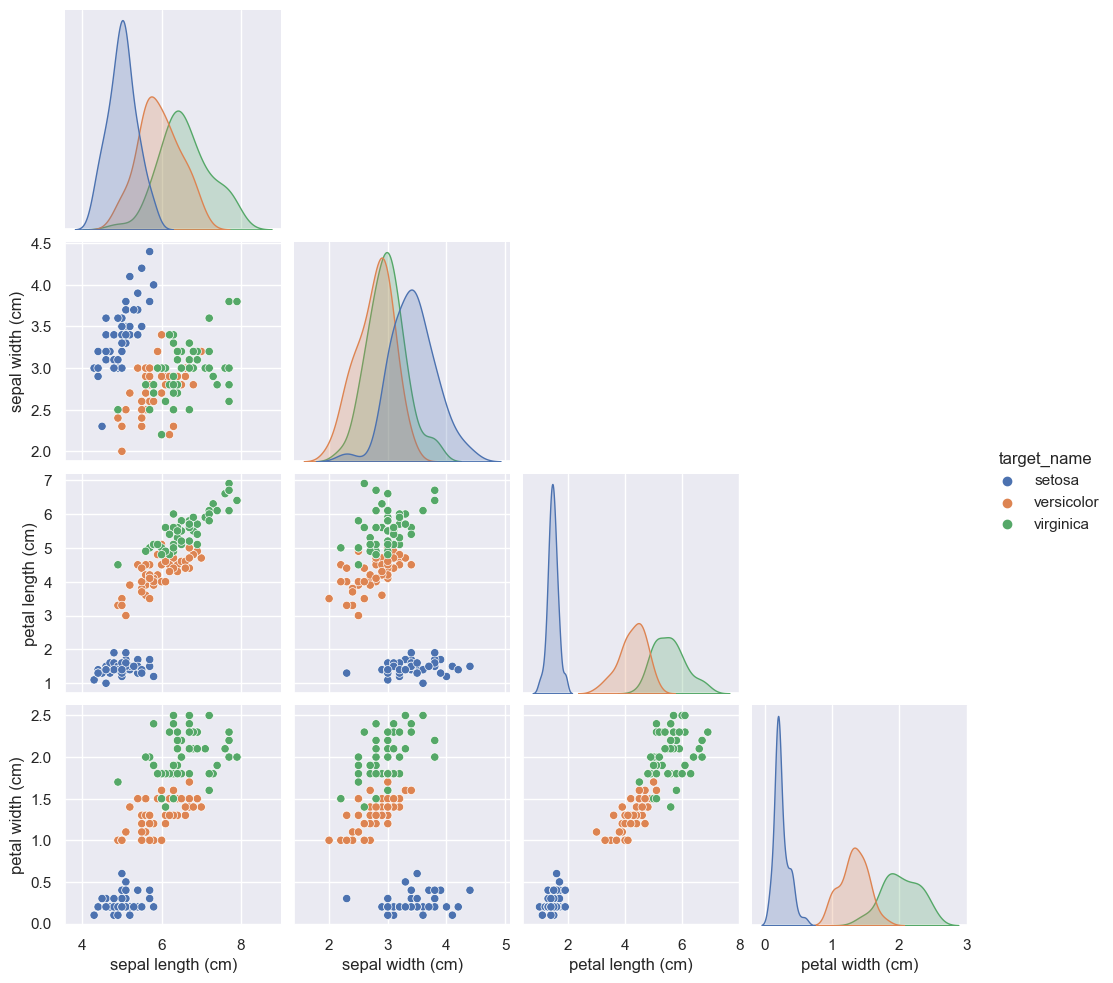

In [22]:
_ = sns.pairplot(df.drop(columns="target"), hue="target_name", corner=True)

### Train test split

In [23]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=4)

In [24]:
df_train.shape

(112, 6)

In [25]:
df_test.shape

(38, 6)

In [26]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
86,6.7,3.1,4.7,1.5,1,versicolor
46,5.1,3.8,1.6,0.2,0,setosa
135,7.7,3.0,6.1,2.3,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
65,6.7,3.1,4.4,1.4,1,versicolor


### Prepare data for modeling

In [27]:
X_train = df_train.drop(columns=["target", "target_name"]).values
y_train = df_train["target"].values

X_test = df_test.drop(columns=["target", "target_name"]).values
y_test = df_test["target"].values

### Modeling

At least beat 33% accuracy

#### Manual modeling

In [28]:
def single_feature_prediction(petal_length):
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2
    
manual_y_prediction = np.array([single_feature_prediction(val) for val in X_train[:, 2]])
manual_model_accuracy = np.mean(manual_y_prediction == y_train)
print(f"Manual model accuracy: {manual_model_accuracy * 100:.2f}%")

Manual model accuracy: 94.64%


#### KNN (K=5)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
model = KNeighborsClassifier(n_neighbors=5)

In [31]:
_ = model.fit(X_train, y_train)

In [32]:
model.score(X_test, y_test)

0.9736842105263158

#### KNN (K=1)

In [33]:
model = KNeighborsClassifier(n_neighbors=1)

In [34]:
_ = model.fit(X_train, y_train)

In [35]:
model.score(X_test, y_test)

0.9473684210526315

### Model Tuning

#### Manually

In [36]:
scores = []
for k in range(1, 26):
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    scores.append([k, cv_scores.mean()])
scores = np.array(scores)
scores

array([[ 1.        ,  0.96439394],
       [ 2.        ,  0.95530303],
       [ 3.        ,  0.97272727],
       [ 4.        ,  0.95530303],
       [ 5.        ,  0.97272727],
       [ 6.        ,  0.96363636],
       [ 7.        ,  0.97272727],
       [ 8.        ,  0.96363636],
       [ 9.        ,  0.97272727],
       [10.        ,  0.98181818],
       [11.        ,  0.97272727],
       [12.        ,  0.98181818],
       [13.        ,  0.98181818],
       [14.        ,  0.97272727],
       [15.        ,  0.97272727],
       [16.        ,  0.96363636],
       [17.        ,  0.96363636],
       [18.        ,  0.95454545],
       [19.        ,  0.96363636],
       [20.        ,  0.94621212],
       [21.        ,  0.94621212],
       [22.        ,  0.94621212],
       [23.        ,  0.95530303],
       [24.        ,  0.95530303],
       [25.        ,  0.95530303]])

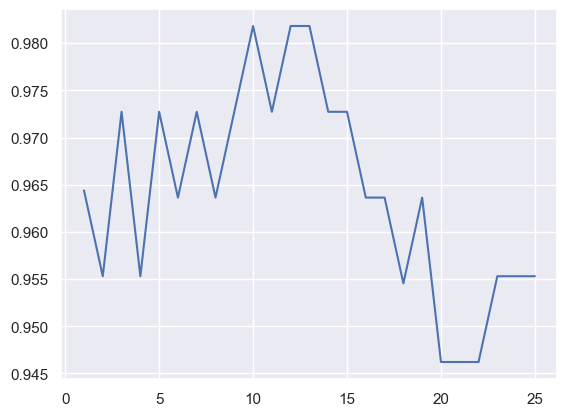

In [37]:
_ = sns.lineplot(x=scores[:, 0], y=scores[:, 1])

#### GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

In [53]:
k_range = range(1, 31)
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
model = KNeighborsClassifier()
grid = GridSearchCV(model, param_grid=param_grid, cv=10, scoring="accuracy")
_ = grid.fit(X_train, y_train)

In [67]:
search_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
search_results["weights"] = search_results["params"].apply(lambda x: x["weights"])
search_results["n_neighbors"] = search_results["params"].apply(lambda x: x["n_neighbors"])
search_results.drop(columns="params", inplace=True)
search_results

,mean_test_score,std_test_score,weights,n_neighbors
0,0.964394,0.043658,uniform,1
1,0.964394,0.043658,distance,1
2,0.955303,0.044748,uniform,2
3,0.964394,0.043658,distance,2
4,0.972727,0.041660,uniform,3
5,0.972727,0.041660,distance,3
6,0.955303,0.060459,uniform,4
7,0.964394,0.043658,distance,4
8,0.972727,0.041660,uniform,5
9,0.972727,0.041660,distance,5


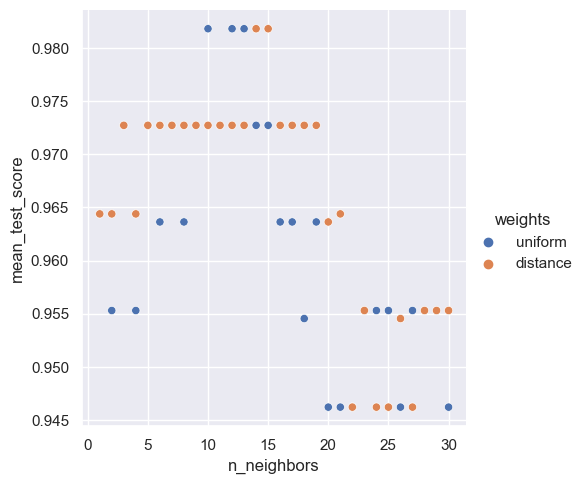

In [72]:
_ = sns.relplot(x=search_results['n_neighbors'], y=search_results['mean_test_score'], hue=search_results['weights'])

In [73]:
grid.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

#### RandomizedSearchCV

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
k_range = range(1, 31)
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)
model = KNeighborsClassifier()
grid = RandomizedSearchCV(model, param_distributions=param_dist, cv=10, scoring="accuracy", n_iter=10, random_state=5)
_ = grid.fit(X_train, y_train)

In [78]:
search_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
search_results["weights"] = search_results["params"].apply(lambda x: x["weights"])
search_results["n_neighbors"] = search_results["params"].apply(lambda x: x["n_neighbors"])
search_results.drop(columns="params", inplace=True)
search_results

,mean_test_score,std_test_score,weights,n_neighbors
0,0.972727,0.058210,distance,16
1,0.946212,0.072383,uniform,22
2,0.954545,0.073293,uniform,18
3,0.955303,0.060459,uniform,27
4,0.955303,0.060459,uniform,29
5,0.972727,0.041660,distance,10
6,0.946212,0.059887,distance,22
7,0.972727,0.041660,uniform,14
8,0.972727,0.041660,distance,12
9,0.972727,0.058210,uniform,15


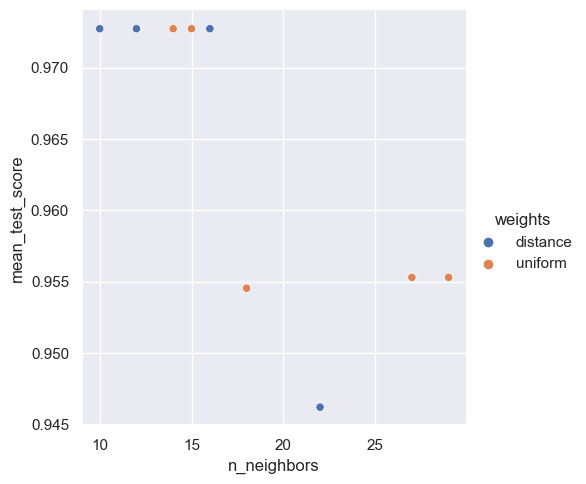

In [79]:
_ = sns.relplot(x=search_results['n_neighbors'], y=search_results['mean_test_score'], hue=search_results['weights'])

In [80]:
grid.best_params_

{'weights': 'distance', 'n_neighbors': 16}

### Final Model

In [74]:
model = KNeighborsClassifier(n_neighbors=10, weights='uniform')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9736842105263158

### RMSE

In [75]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.16222142113076254